# California Housing Price Prediction - Linear 

### TASK 1: DATA EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

print(f"📋 Dataset shape: {df.shape}")
print(f"🏘️  Features: {list(housing.feature_names)}")

# Display basic information
print("\n📈 Dataset Overview:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

📋 Dataset shape: (20640, 9)
🏘️  Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

📈 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

📊 Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000     


📊 Analyzing feature: MedInc


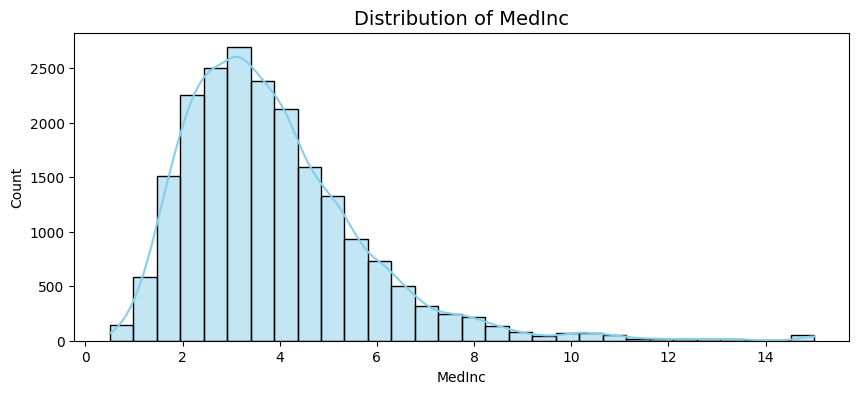

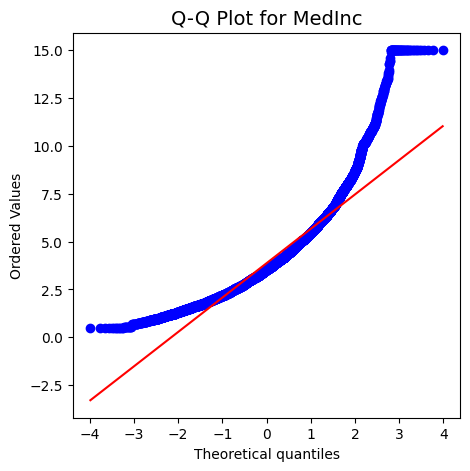

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.893, p-value=0.000
⚠️ MedInc: Data is not normal → IQR method is more robust for outliers.
Skewness: 1.647, Kurtosis: 4.951

📊 Analyzing feature: HouseAge


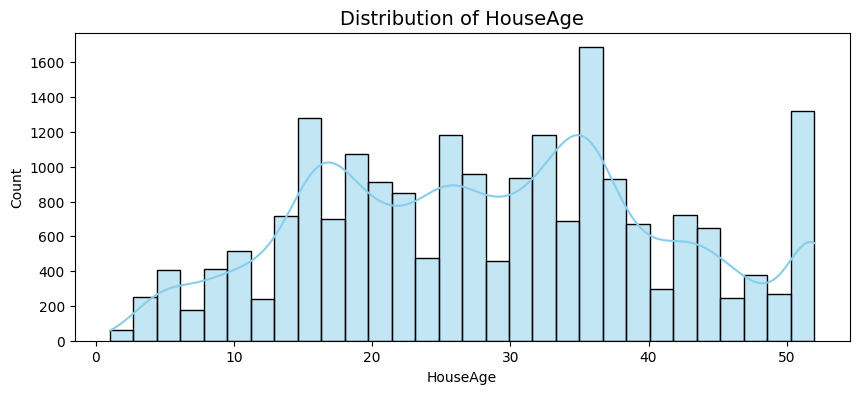

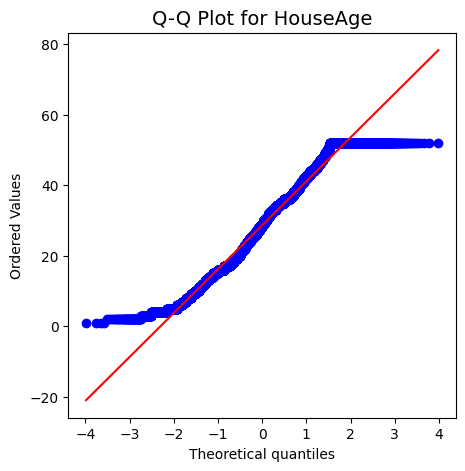

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.978, p-value=0.000
⚠️ HouseAge: Data is not normal → IQR method is more robust for outliers.
Skewness: 0.060, Kurtosis: -0.801

📊 Analyzing feature: AveRooms


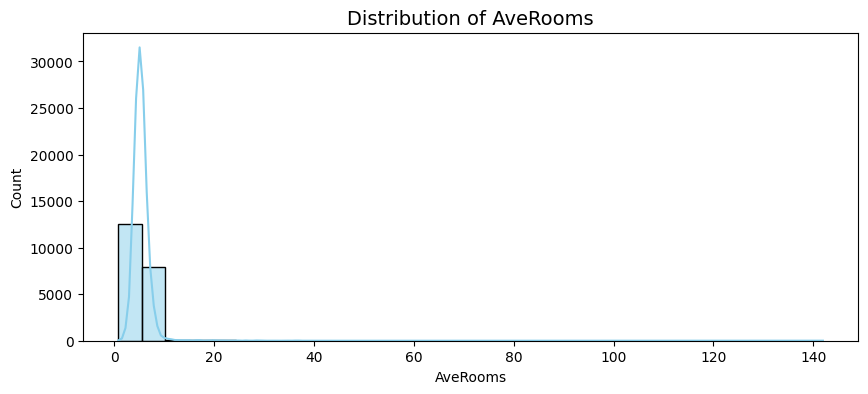

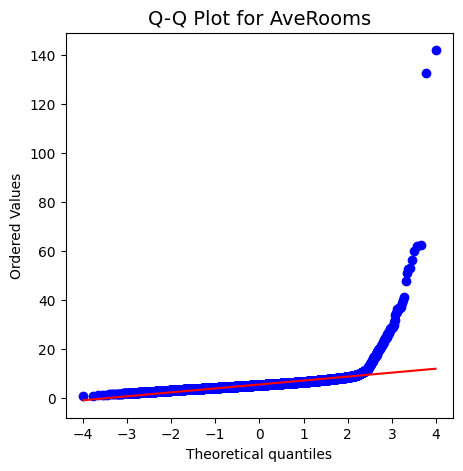

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.426, p-value=0.000
⚠️ AveRooms: Data is not normal → IQR method is more robust for outliers.
Skewness: 20.696, Kurtosis: 879.140

📊 Analyzing feature: AveBedrms


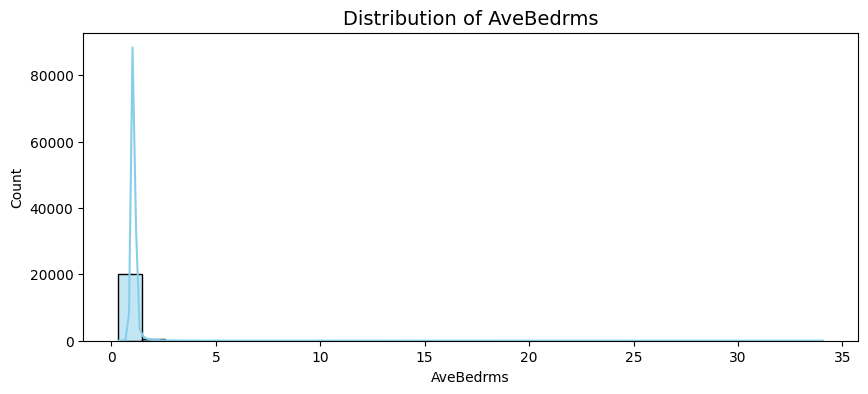

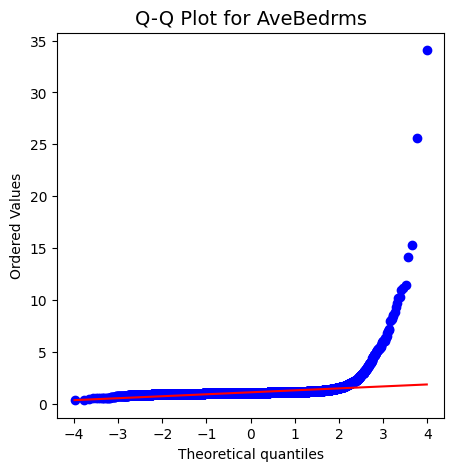

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.160, p-value=0.000
⚠️ AveBedrms: Data is not normal → IQR method is more robust for outliers.
Skewness: 31.315, Kurtosis: 1636.315

📊 Analyzing feature: Population


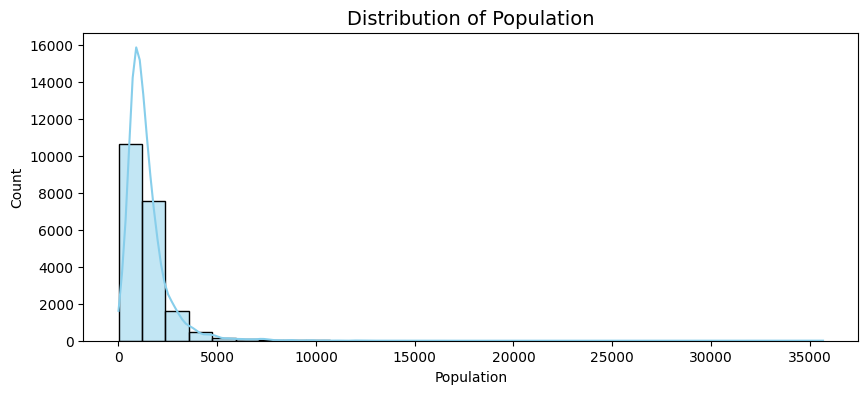

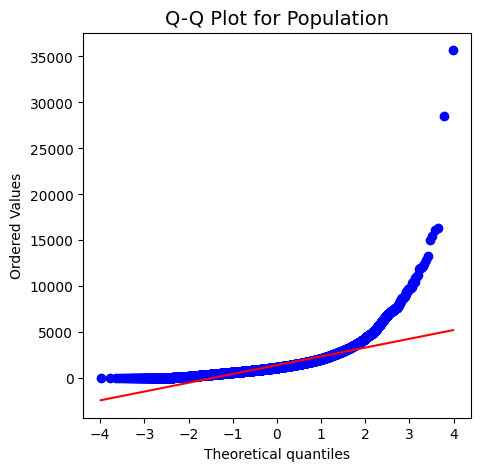

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.713, p-value=0.000
⚠️ Population: Data is not normal → IQR method is more robust for outliers.
Skewness: 4.935, Kurtosis: 73.535

📊 Analyzing feature: AveOccup


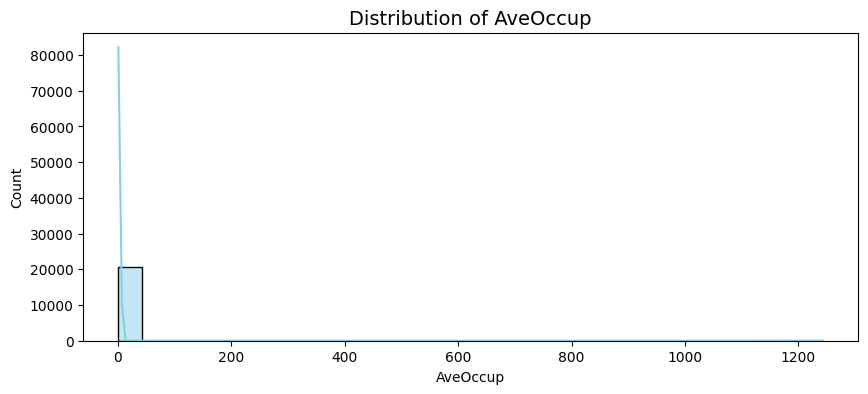

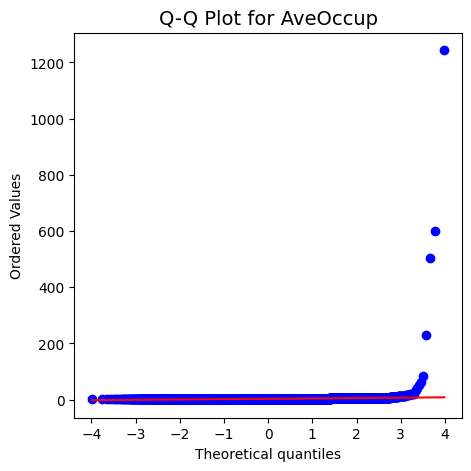

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.016, p-value=0.000
⚠️ AveOccup: Data is not normal → IQR method is more robust for outliers.
Skewness: 97.632, Kurtosis: 10648.430

📊 Analyzing feature: Latitude


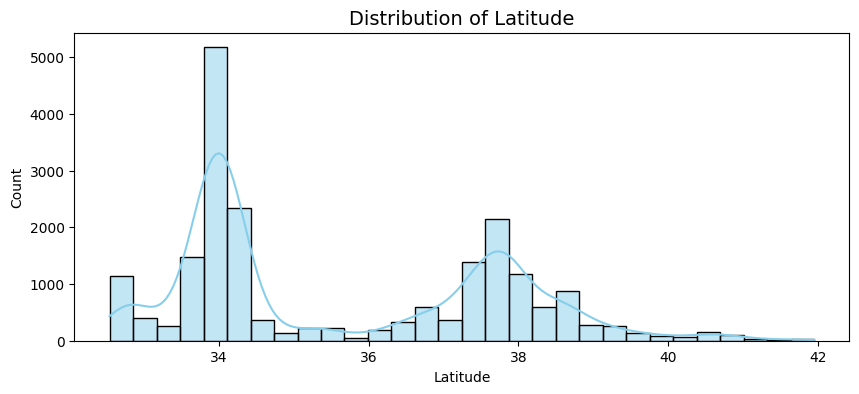

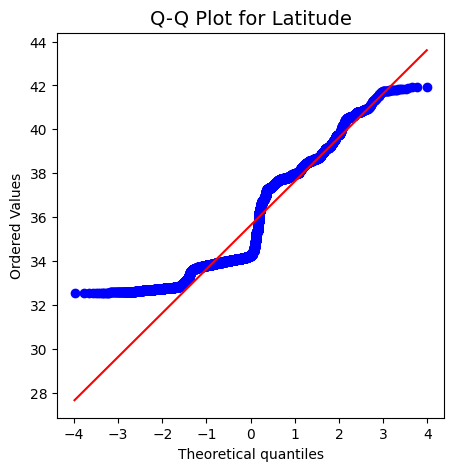

c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test → Statistic=0.877, p-value=0.000
⚠️ Latitude: Data is not normal → IQR method is more robust for outliers.
Skewness: 0.466, Kurtosis: -1.118

📊 Analyzing feature: Longitude


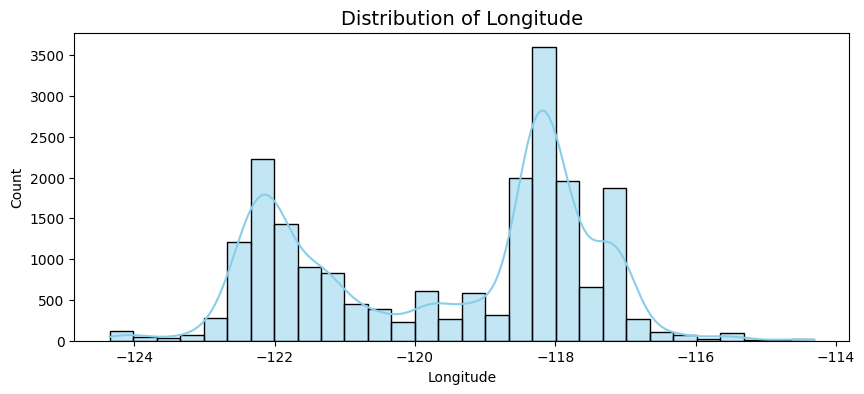

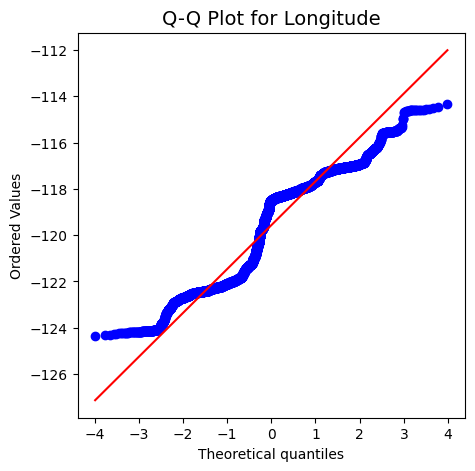

Shapiro-Wilk Test → Statistic=0.897, p-value=0.000
⚠️ Longitude: Data is not normal → IQR method is more robust for outliers.
Skewness: -0.298, Kurtosis: -1.330


c:\Users\Kinjal\OneDrive\Desktop\Github\Misogi Assignments\Week 7\MisogiAi-Machine-Learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
import scipy.stats as stats
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
            'Population', 'AveOccup', 'Latitude', 'Longitude']

for col in features:
    print(f"\n📊 Analyzing feature: {col}")
    data = df[col].dropna()
    
    # 1. Histogram + KDE
    plt.figure(figsize=(10,4))
    sns.histplot(data, kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()
    
    # 2. Q-Q Plot
    plt.figure(figsize=(5,5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}", fontsize=14)
    plt.show()
    
    # 3. Shapiro-Wilk normality test
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test → Statistic={stat:.3f}, p-value={p_value:.3f}")
    
    if p_value > 0.05:
        print(f"✅ {col}: Data looks approximately normal → Z-score method is appropriate for outliers.")
    else:
        print(f"⚠️ {col}: Data is not normal → IQR method is more robust for outliers.")
    
    # 4. Skewness & Kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"Skewness: {skewness:.3f}, Kurtosis: {kurtosis:.3f}")

In [3]:
# Check for missing values
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# Check for outliers using IQR method
print("\n📊 Outlier Analysis (using IQR method):")
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"{column}: {outliers} outliers ({outliers/len(df)*100:.1f}%)")


🔍 Missing Values Check:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
✅ No missing values found!

📊 Outlier Analysis (using IQR method):
MedInc: 681 outliers (3.3%)
HouseAge: 0 outliers (0.0%)
AveRooms: 511 outliers (2.5%)
AveBedrms: 1424 outliers (6.9%)
Population: 1196 outliers (5.8%)
AveOccup: 711 outliers (3.4%)
Latitude: 0 outliers (0.0%)
Longitude: 0 outliers (0.0%)
target: 1071 outliers (5.2%)



🔗 Feature Correlations with Target:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

🎨 Generating visualizations...


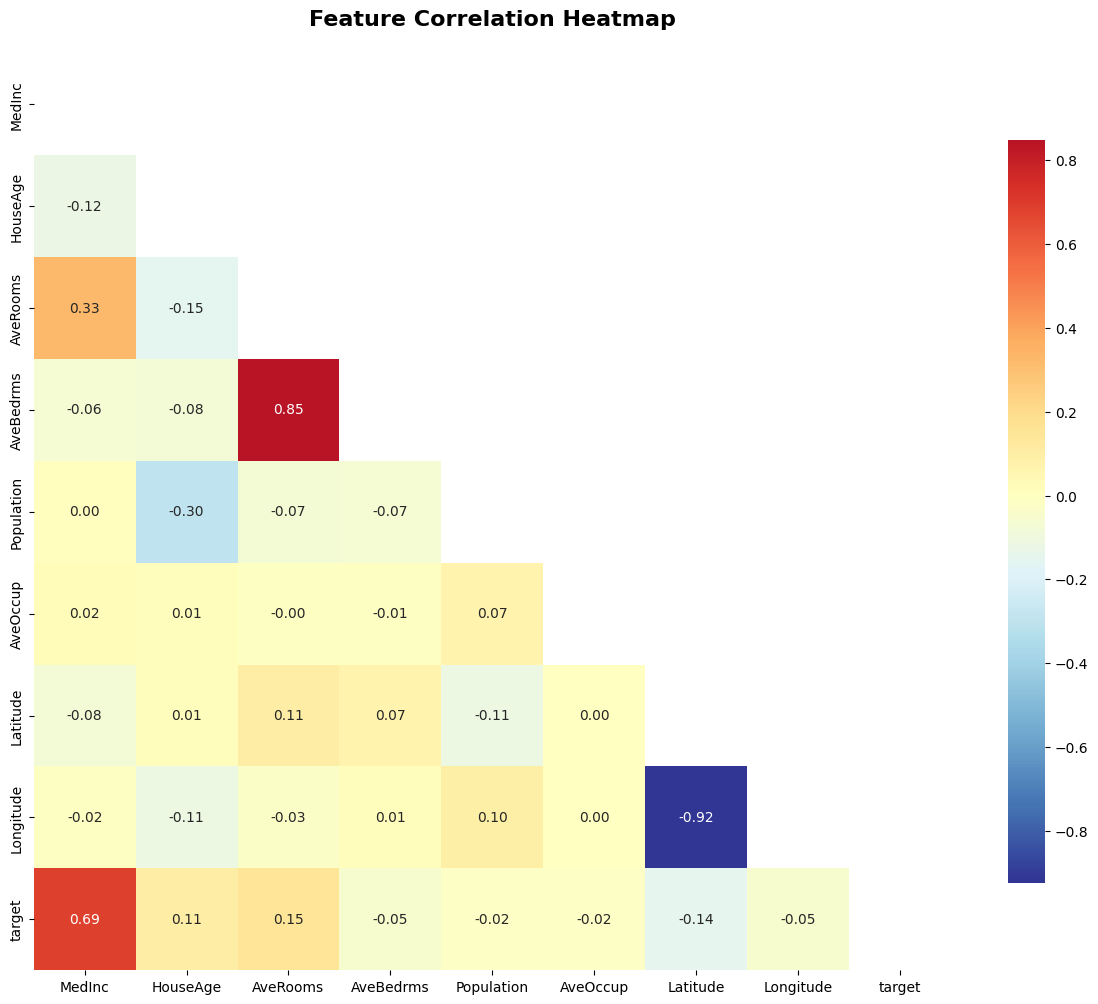

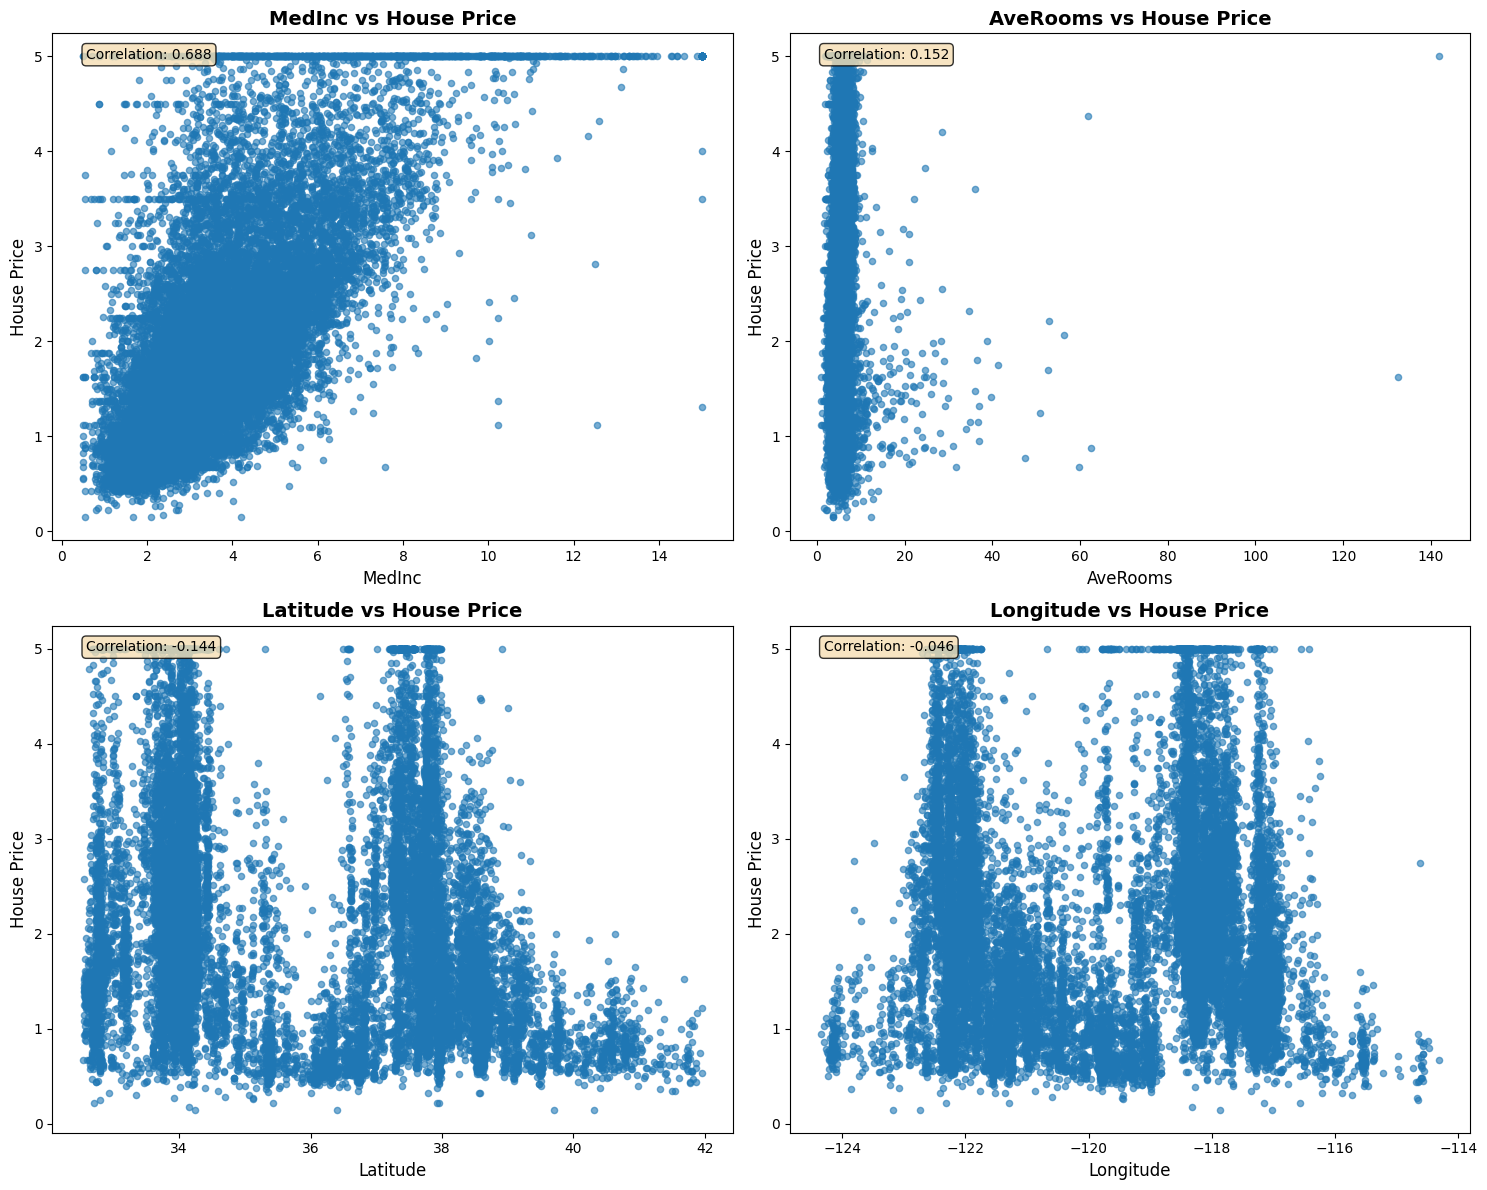

In [9]:
# Feature correlations
print("\n🔗 Feature Correlations with Target:")
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

# Visualization function
def create_correlation_heatmap(df):
    """Create correlation heatmap"""
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

def create_scatter_plots(df):
    """Create scatter plots for key relationships"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Most correlated features with target
    top_features = ['MedInc', 'AveRooms', 'Latitude', 'Longitude']
    
    for i, feature in enumerate(top_features):
        row, col = i // 2, i % 2
        axes[row, col].scatter(df[feature], df['target'], alpha=0.6, s=20)
        axes[row, col].set_xlabel(feature, fontsize=12)
        axes[row, col].set_ylabel('House Price', fontsize=12)
        axes[row, col].set_title(f'{feature} vs House Price', fontsize=14, fontweight='bold')
        
        # Add correlation coefficient
        corr = df[feature].corr(df['target'])
        axes[row, col].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[row, col].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Generate visualizations
print("\n🎨 Generating visualizations...")
create_correlation_heatmap(df)
create_scatter_plots(df)

### TASK 2: DATA PREPROCESSING

In [10]:
# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data split completed:")
print(f"   📚 Training set: {X_train.shape[0]} samples")
print(f"   📝 Testing set: {X_test.shape[0]} samples")

📊 Features shape: (20640, 8)
🎯 Target shape: (20640,)
✅ Data split completed:
   📚 Training set: 16512 samples
   📝 Testing set: 4128 samples


In [11]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"⚖️  Feature scaling completed using StandardScaler")

⚖️  Feature scaling completed using StandardScaler


In [12]:
# Create polynomial features for MedInc (most correlated feature)
print(f"\n🔢 Creating polynomial features for 'MedInc'...")
poly = PolynomialFeatures(degree=2, include_bias=False)


🔢 Creating polynomial features for 'MedInc'...


In [13]:
# Apply polynomial transformation only to MedInc
medinc_train = X_train[['MedInc']]
medinc_test = X_test[['MedInc']]

medinc_poly_train = poly.fit_transform(medinc_train)
medinc_poly_test = poly.transform(medinc_test)

# Combine polynomial features with other scaled features
other_features_train = X_train_scaled[:, 1:]  # All except MedInc
other_features_test = X_test_scaled[:, 1:]   # All except MedInc

X_train_poly = np.column_stack([X_train_scaled[:, 0:1], medinc_poly_train[:, 1:], other_features_train])
X_test_poly = np.column_stack([X_test_scaled[:, 0:1], medinc_poly_test[:, 1:], other_features_test])

print(f"✅ Polynomial features created:")
print(f"   📊 Original features: {X_train_scaled.shape[1]}")
print(f"   📊 With polynomial: {X_train_poly.shape[1]}")

✅ Polynomial features created:
   📊 Original features: 8
   📊 With polynomial: 9


### TASK 3: MODEL IMPLEMENTATION

In [15]:
# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0, random_state=42)

linear_reg.fit(X_train_scaled, y_train)

ridge_reg.fit(X_train_scaled, y_train)

# Train polynomial model
linear_poly = LinearRegression()
linear_poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_poly = linear_poly.predict(X_test_poly)

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Evaluate all models
linear_metrics = evaluate_model(y_test, y_pred_linear, "Linear Regression")
ridge_metrics = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
poly_metrics = evaluate_model(y_test, y_pred_poly, "Polynomial Linear Regression")

# Create comparison table
comparison_df = pd.DataFrame({
    'Linear Regression': linear_metrics,
    'Ridge Regression': ridge_metrics,
    'Polynomial Regression': poly_metrics
})

print("\n📊 MODEL PERFORMANCE COMPARISON TABLE:")
print(comparison_df.round(4))


📊 MODEL PERFORMANCE COMPARISON TABLE:
      Linear Regression  Ridge Regression  Polynomial Regression
MSE              0.5559            0.5559                 0.5560
RMSE             0.7456            0.7456                 0.7456
MAE              0.5332            0.5332                 0.5342
R2               0.5758            0.5758                 0.5757


### Task 4: Analysis & Insights

In [16]:
# Feature importance analysis

feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Linear_Coef': linear_reg.coef_,
    'Ridge_Coef': ridge_reg.coef_
})

feature_importance['Abs_Linear'] = np.abs(feature_importance['Linear_Coef'])
feature_importance['Abs_Ridge'] = np.abs(feature_importance['Ridge_Coef'])
feature_importance = feature_importance.sort_values('Abs_Linear', ascending=False)

print("🏆 Feature Importance (by absolute coefficient value):")
print(feature_importance[['Feature', 'Linear_Coef', 'Ridge_Coef']].round(4))

🏆 Feature Importance (by absolute coefficient value):
      Feature  Linear_Coef  Ridge_Coef
6    Latitude      -0.8969     -0.8962
7   Longitude      -0.8698     -0.8691
0      MedInc       0.8544      0.8543
3   AveBedrms       0.3393      0.3390
2    AveRooms      -0.2944     -0.2942
1    HouseAge       0.1225      0.1226
5    AveOccup      -0.0408     -0.0408
4  Population      -0.0023     -0.0023


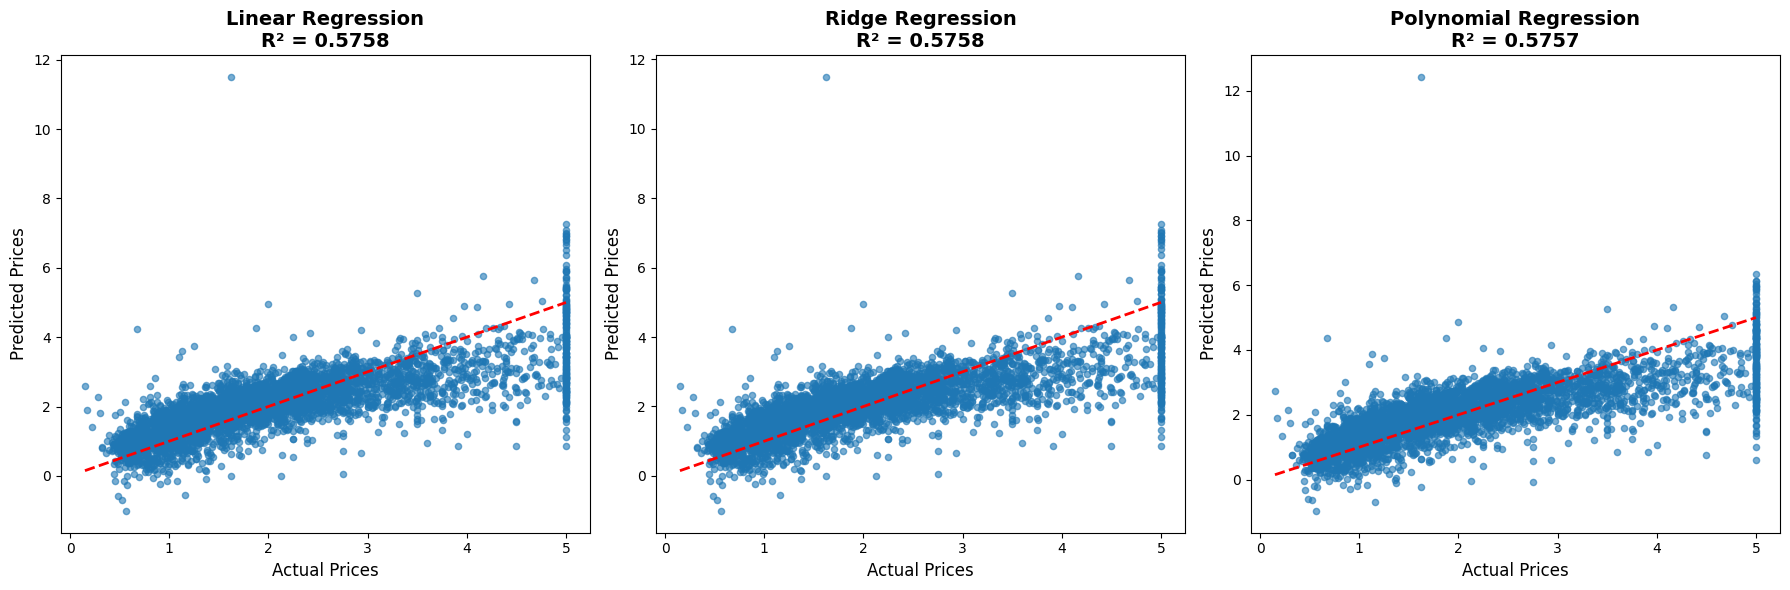

In [18]:
# Visualization of predictions vs actual
def plot_predictions_vs_actual():
    """Plot predictions vs actual values"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    models = [
        ("Linear Regression", y_pred_linear),
        ("Ridge Regression", y_pred_ridge),
        ("Polynomial Regression", y_pred_poly)
    ]
    
    for i, (name, predictions) in enumerate(models):
        axes[i].scatter(y_test, predictions, alpha=0.6, s=20)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel('Actual Prices', fontsize=12)
        axes[i].set_ylabel('Predicted Prices', fontsize=12)
        axes[i].set_title(f'{name}\nR² = {r2_score(y_test, predictions):.4f}', fontsize=14, fontweight='bold')
        
    plt.tight_layout()
    plt.show()

plot_predictions_vs_actual()

🔍 Generating residual analysis...


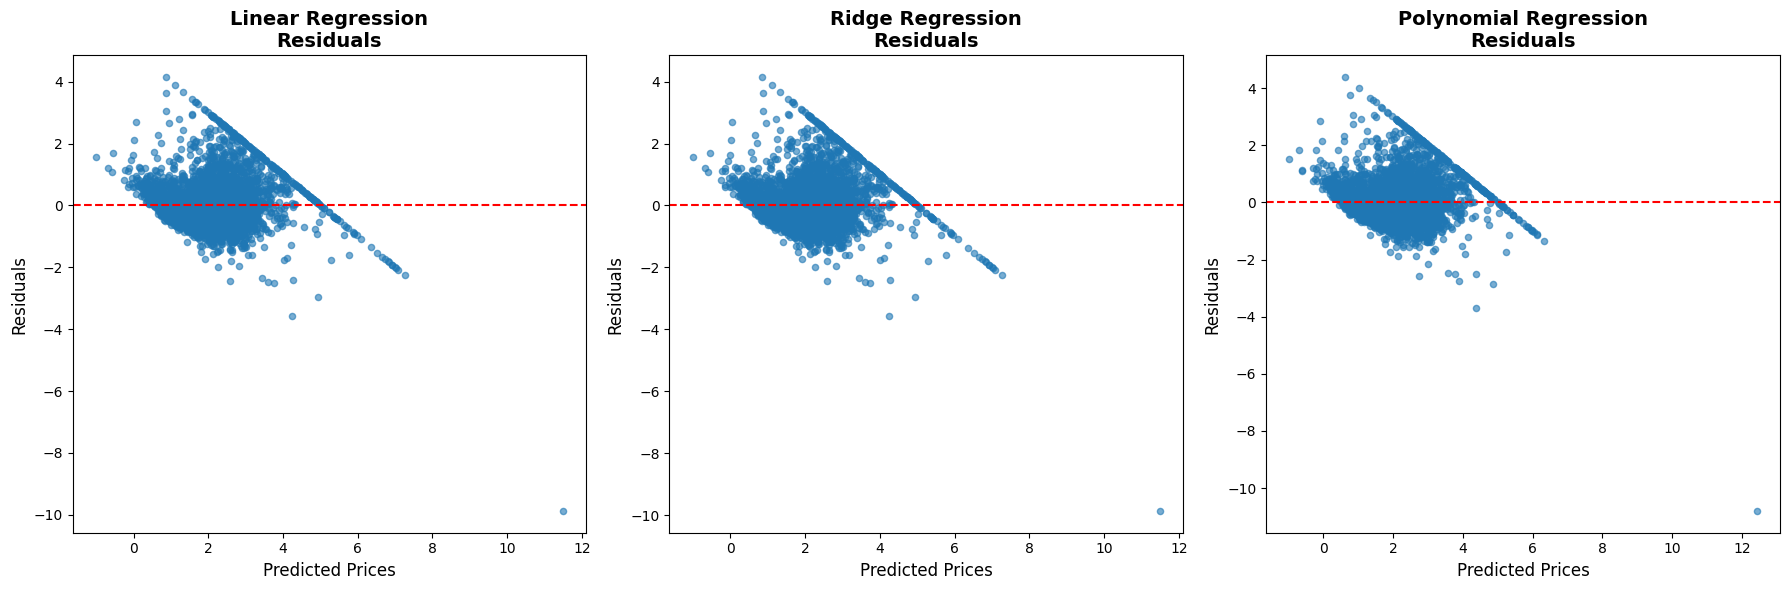

In [17]:
# Residual analysis
def plot_residuals():
    """Plot residual analysis"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    models = [
        ("Linear Regression", y_pred_linear),
        ("Ridge Regression", y_pred_ridge),
        ("Polynomial Regression", y_pred_poly)
    ]
    
    for i, (name, predictions) in enumerate(models):
        residuals = y_test - predictions
        axes[i].scatter(predictions, residuals, alpha=0.6, s=20)
        axes[i].axhline(y=0, color='r', linestyle='--')
        axes[i].set_xlabel('Predicted Prices', fontsize=12)
        axes[i].set_ylabel('Residuals', fontsize=12)
        axes[i].set_title(f'{name}\nResiduals', fontsize=14, fontweight='bold')
        
    plt.tight_layout()
    plt.show()

print("🔍 Generating residual analysis...")
plot_residuals()

In [19]:
print("\n1. 📊 MOST IMPORTANT FEATURES:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   🏆 {row['Feature']}: {row['Linear_Coef']:.4f}")

print(f"\n2. 🎯 MODEL PERFORMANCE RANKING:")
models_r2 = [
    ("Linear Regression", linear_metrics['R2']),
    ("Ridge Regression", ridge_metrics['R2']),
    ("Polynomial Regression", poly_metrics['R2'])
]
models_r2.sort(key=lambda x: x[1], reverse=True)

for i, (model, r2) in enumerate(models_r2, 1):
    print(f"   {i}. {model}: R² = {r2:.4f}")

print("\n3. 🚨 MODEL LIMITATIONS:")
print("   • Linear assumption may not capture complex relationships")
print("   • Polynomial features help but may lead to overfitting")
print("   • Ridge regression shows similar performance to linear regression")
print("   • Geographic features (Lat/Long) have complex non-linear relationships")

print("\n4. 🔧 SUGGESTED IMPROVEMENTS:")
print("   • Try non-linear models (Random Forest, Gradient Boosting)")
print("   • Feature engineering: create geographic clusters")
print("   • Add interaction terms between features")
print("   • Use cross-validation for better model selection")
print("   • Consider ensemble methods")
print("   • Handle outliers more systematically")


1. 📊 MOST IMPORTANT FEATURES:
   🏆 Latitude: -0.8969
   🏆 Longitude: -0.8698
   🏆 MedInc: 0.8544

2. 🎯 MODEL PERFORMANCE RANKING:
   1. Ridge Regression: R² = 0.5758
   2. Linear Regression: R² = 0.5758
   3. Polynomial Regression: R² = 0.5757

3. 🚨 MODEL LIMITATIONS:
   • Linear assumption may not capture complex relationships
   • Polynomial features help but may lead to overfitting
   • Ridge regression shows similar performance to linear regression
   • Geographic features (Lat/Long) have complex non-linear relationships

4. 🔧 SUGGESTED IMPROVEMENTS:
   • Try non-linear models (Random Forest, Gradient Boosting)
   • Feature engineering: create geographic clusters
   • Add interaction terms between features
   • Use cross-validation for better model selection
   • Consider ensemble methods
   • Handle outliers more systematically
